<a href="https://colab.research.google.com/github/riyash0109/MachineLearning/blob/main/Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as ply  
import pandas as pd 

In [ ]:
#importing dataset
data = pd.read_csv("/content/indian_airquality2.csv")

In [ ]:
data.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00,16.0,42.0,27.0


In [ ]:
df = data.dropna()

In [ ]:
x = df.loc[:,['pollutant_min','pollutant_max']].values

In [ ]:
print(x)

[[ 69. 109.]
 [ 82. 138.]
 [ 10.  42.]
 ...
 [  6.  28.]
 [ 34.  92.]
 [ 10. 116.]]


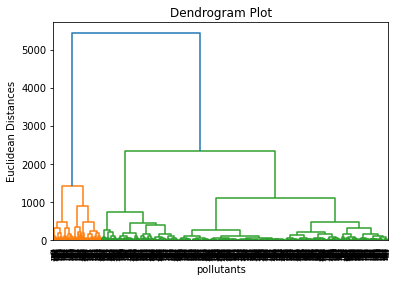

In [ ]:
import scipy.cluster.hierarchy as sch
dendo = sch.dendrogram(sch.linkage(x, method = 'ward'))

ply.title("Dendrogram Plot")
ply.ylabel("Euclidean Distances")
ply.xlabel("pollutants")
ply.show()

In the above diagram, we see that the vertical distances that are not cutting their horizontal bars. According to this, the number of clusters will be 6(the vertical lines in this range).

So, the optimal number of clusters will be 6, and we will train the model in the next step, using the same.

In [ ]:
from scipy.spatial.distance import euclidean
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 2, affinity="euclidean", linkage = "ward")

In [ ]:
y_pred =  hc.fit_predict(x)

The AgglomerativeClustering class takes the following parameters:

n_clusters=2: It defines the number of clusters, and we have taken here 2 because it is the optimal number of clusters.

affinity='euclidean': It is a metric used to compute the linkage.

linkage='ward': It defines the linkage criteria, here we have used the "ward" linkage. This method is the popular linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.

In the last line, we have created the dependent variable y_pred to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs.


In [ ]:
print(y_pred)

[0 0 0 ... 0 0 0]


.

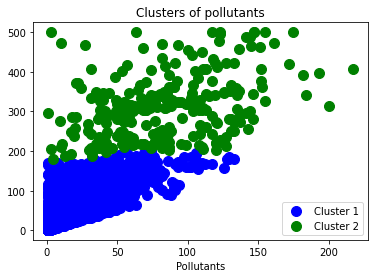

In [ ]:
#visulaizing the clusters  
ply.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
ply.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
# ply.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
ply.title('Clusters of pollutants')  
ply.xlabel('Pollutants')  
ply.ylabel('')  
ply.legend()  
ply.show()  

Hierarchical Clustering over k-Mean Clustering

Advantages
• Hierarchical clustering outputs a hierarchy, ie a structure that is more informative than the unstructured set of flat clusters returned by k-means. Therefore, it is easier to decide on the number of clusters by looking at the dendrogram

Disavantages
• It is not possible to undo the previous step: once the instances have been assigned to a cluster, they can no longer be moved around.
• Time complexity: not suitable for large datasets
• Initial seeds have a strong impact on the final results
• The order of the data has an impact on the final results
• Very sensitive to outliers